In [109]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [110]:
df = pd.read_csv('dbscan.csv')

df.columns

X = df[['x', 'y']].to_numpy()

In [111]:
x = df.x
y = df.y

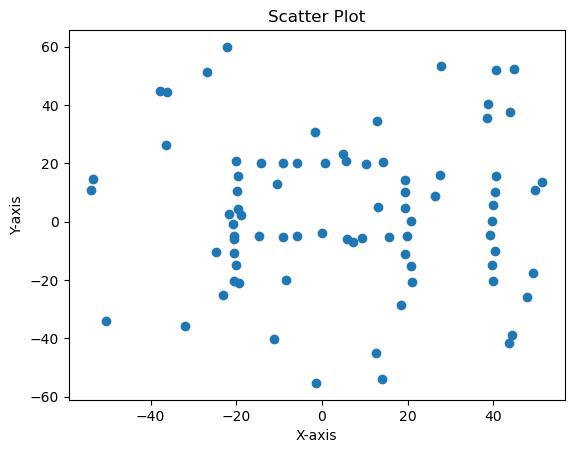

In [112]:
plt.scatter(x, y)
# Add labels to x and y axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a title to the plot
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [113]:
X

array([[ 5.14180890e+01,  1.35936103e+01],
       [ 3.91323184e+01, -4.41920442e+00],
       [ 4.78075151e+01, -2.58225605e+01],
       [ 2.76997029e+01,  5.34341931e+01],
       [ 3.98609948e+01,  5.67687090e+00],
       [-1.98918593e+01,  1.04102738e+01],
       [-5.02825323e-02, -4.03252228e+00],
       [ 1.85625119e+01, -2.86549799e+01],
       [-1.46299037e+01, -4.88704016e+00],
       [ 3.87438810e+01,  4.04002901e+01],
       [-1.94214743e+01, -2.08810425e+01],
       [-9.11455701e+00, -5.25181929e+00],
       [ 4.00535220e+01, -2.03351032e+01],
       [ 4.43200188e+01, -3.87076675e+01],
       [-5.71713996e+00, -5.06161251e+00],
       [ 4.93300097e+01, -1.77116706e+01],
       [ 1.02030453e+01,  1.96519021e+01],
       [ 7.28819131e+00, -7.04286018e+00],
       [-5.04723219e+01, -3.40220016e+01],
       [-1.99817820e+01,  2.08916173e+01],
       [ 9.29823006e+00, -5.66296243e+00],
       [ 2.76456461e+01,  1.60435321e+01],
       [-2.31475796e+01, -2.50897082e+01],
       [-3.

In [114]:
import plotly.express as px

In [115]:
from scipy.spatial.distance import cdist

# Assuming 'data' is your dataset (an array or list of data points)
# Calculate the distance matrix using the desired distance metric (e.g., Euclidean distance)
distance_matrix = cdist(X, X, metric='euclidean')


In [116]:
distance_matrix

array([[  0.        ,  21.80370733,  39.5811921 , ...,  92.8252679 ,
         25.24656396,  86.80167508],
       [ 21.80370733,   0.        ,  23.09464639, ...,  89.69583393,
         42.43021939,  65.0427505 ],
       [ 39.5811921 ,  23.09464639,   0.        , ..., 109.41043158,
         63.66527192,  57.35221072],
       ...,
       [ 92.8252679 ,  89.69583393, 109.41043158, ...,   0.        ,
         80.46420873, 105.48824806],
       [ 25.24656396,  42.43021939,  63.66527192, ...,  80.46420873,
          0.        , 103.51328273],
       [ 86.80167508,  65.0427505 ,  57.35221072, ..., 105.48824806,
        103.51328273,   0.        ]])

In [135]:
X[:,1]

array([ 1.35936103e+01, -4.41920442e+00, -2.58225605e+01,  5.34341931e+01,
        5.67687090e+00,  1.04102738e+01, -4.03252228e+00, -2.86549799e+01,
       -4.88704016e+00,  4.04002901e+01, -2.08810425e+01, -5.25181929e+00,
       -2.03351032e+01, -3.87076675e+01, -5.06161251e+00, -1.77116706e+01,
        1.96519021e+01, -7.04286018e+00, -3.40220016e+01,  2.08916173e+01,
       -5.66296243e+00,  1.60435321e+01, -2.50897082e+01,  2.64355209e+01,
        5.99108016e+01,  2.00639724e+01,  1.99508970e+01,  1.10137863e+01,
       -1.47891647e+01,  2.07456977e+01,  5.36380318e-02,  1.41422943e+01,
        2.17002109e+00,  3.56003185e+01,  1.99402888e+01,  5.22111724e+01,
        3.45856632e+01, -1.09516518e+01, -5.30736560e+00, -1.49226878e+01,
       -9.97133771e+00, -3.59055578e+01, -5.79427224e+00,  1.45898424e+01,
       -4.02493925e+01, -4.84986662e+00,  2.33560516e+01, -2.05203941e+01,
        2.03436209e+01,  1.00069156e+01, -1.04620045e+01, -4.17138593e+01,
        4.59638321e+00, -

In [136]:
import numpy as np

def dbscan(X,distance_matrix, epsilon, minPts):
    num_points = distance_matrix.shape[0]
    visited = np.zeros(num_points, dtype=bool)
    labels = np.zeros(num_points, dtype=int)
    cluster_label = 0
    output = []
    point_coordinates = np.array([[x, y] for x in X[:,0] for y in X[:,1]])

    for i in range(num_points):
        if visited[i]:
            continue

        visited[i] = True
        neighbors = region_query(i, distance_matrix, epsilon)

        if len(neighbors) < minPts:
            labels[i] = -1
        else:
            cluster_label += 1
            expand_cluster(i, neighbors, cluster_label, visited, labels, distance_matrix, epsilon, minPts)

    for i in range(num_points):
        neighbor_indices = [str(x) for x in region_query(i, distance_matrix, epsilon)]
        output.append([i, point_coordinates[i, 0], point_coordinates[i, 1], len(neighbor_indices), ','.join(neighbor_indices)])

    return output


def expand_cluster(point_index, neighbors, cluster_label, visited, labels, distance_matrix, epsilon, minPts):
    labels[point_index] = cluster_label

    while len(neighbors) > 0:
        current_point = neighbors[0]
        neighbors = neighbors[1:]

        if not visited[current_point]:
            visited[current_point] = True
            current_neighbors = region_query(current_point, distance_matrix, epsilon)

            if len(current_neighbors) >= minPts:
                neighbors.extend(current_neighbors)

        if labels[current_point] == 0:
            labels[current_point] = cluster_label


def region_query(point_index, distance_matrix, epsilon):
    neighbors = []
    for i, distance in enumerate(distance_matrix[point_index]):
        if distance <= epsilon:
            neighbors.append(i)
    return neighbors


In [138]:
results = dbscan(X,distance_matrix,7.5,3)

In [139]:
results 

[[0, 51.4180890272801, 13.593610291024676, 2, '0,27'],
 [1, 51.4180890272801, -4.419204415001493, 3, '1,40,75'],
 [2, 51.4180890272801, -25.822560549769435, 1, '2'],
 [3, 51.4180890272801, 53.434193065153295, 1, '3'],
 [4, 51.4180890272801, 5.676870901714278, 3, '4,56,75'],
 [5, 51.4180890272801, 10.410273811660709, 3, '5,70,74'],
 [6, 51.4180890272801, -4.032522275625189, 3, '6,14,42'],
 [7, 51.4180890272801, -28.65497990837755, 1, '7'],
 [8, 51.4180890272801, -4.887040158034663, 5, '8,11,60,63,72'],
 [9, 51.4180890272801, 40.400290121056685, 3, '9,33,78'],
 [10, 51.4180890272801, -20.88104250119114, 4, '10,22,39,71'],
 [11, 51.4180890272801, -5.251819287270827, 3, '8,11,14'],
 [12, 51.4180890272801, -20.335103200383447, 2, '12,28'],
 [13, 51.4180890272801, -38.70766750849579, 2, '13,51'],
 [14, 51.4180890272801, -5.061612513797467, 3, '6,11,14'],
 [15, 51.4180890272801, -17.71167061272066, 1, '15'],
 [16, 51.4180890272801, 19.651902116097983, 4, '16,29,46,48'],
 [17, 51.4180890272801

In [121]:
px.scatter(x=x, y=y,color = label)


In [122]:
label

array([-1,  1, -1, -1,  1,  2,  2, -1,  2,  3,  2,  2,  1, -1,  2, -1,  2,
        2, -1,  2,  2,  2,  2, -1, -1,  2,  2, -1,  1,  2,  2,  2,  2,  3,
        2, -1, -1,  2,  2,  2,  1, -1,  2, -1, -1,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2, -1,  1, -1, -1, -1,  2, -1, -1,  2,  2, -1,  1,  2,
        2,  2,  2,  2,  2, -1,  2,  1,  2, -1,  3, -1])